In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [688]:
lending_club = pd.read_csv("loan.csv")
# lending_club.to_csv("loan.csv")

In [689]:
# lending_club.drop(['loan_amnt', 'funded_amnt', 'delinq_2yrs', 'revol_util', 'recoveries', 'pub_rec', 'open_acc'], axis=1, inplace=True)
# lending_club.drop('Unnamed: 0', axis=1, inplace=True)
lending_club.head()

,Unnamed: 0,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_mon,issue_yr,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc
0,0,60 months,15.27,59.83,C,Ryder,0 yrs,RENT,30000.0,Source Verified,12,2011,Charged Off,car,309xx,GA,1.00,1687,4
1,1,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ yrs,RENT,49200.0,Source Verified,12,2011,Fully Paid,other,917xx,CA,20.00,5598,37
2,2,36 months,7.90,156.46,A,Veolia Transportaton,3 yrs,RENT,36000.0,Source Verified,12,2011,Fully Paid,wedding,852xx,AZ,11.20,7963,12
3,3,60 months,15.96,170.08,C,Southern Star Photography,8 yrs,RENT,47004.0,Not Verified,12,2011,Fully Paid,debt_consolidation,280xx,NC,23.51,17726,11
4,4,36 months,18.64,109.43,E,MKC Accounting,9 yrs,RENT,48000.0,Source Verified,12,2011,Fully Paid,car,900xx,CA,5.35,8221,4


In [690]:
missing_values = lending_club.isnull().sum()
missing_values

Unnamed: 0             0
term                   0
int_rate               0
installment            0
grade                  0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_mon              0
issue_yr               0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
revol_bal              0
total_acc              0
dtype: int64

In [691]:
## Drop null values from emp_length
# lending_club.drop(lending_club[lending_club['emp_length'].isna()].index, inplace=True)

In [692]:
lending_club.columns

Index(['Unnamed: 0', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_mon', 'issue_yr', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'revol_bal', 'total_acc'],
      dtype='object')

In [693]:
# lending_club.reset_index(drop=True, inplace=True) # Reset index after datacleaning
lending_club.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36136 entries, 0 to 36135
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36136 non-null  int64  
 1   term                 36136 non-null  object 
 2   int_rate             36136 non-null  float64
 3   installment          36136 non-null  float64
 4   grade                36136 non-null  object 
 5   emp_title            36136 non-null  object 
 6   emp_length           36136 non-null  object 
 7   home_ownership       36136 non-null  object 
 8   annual_inc           36136 non-null  float64
 9   verification_status  36136 non-null  object 
 10  issue_mon            36136 non-null  int64  
 11  issue_yr             36136 non-null  int64  
 12  loan_status          36136 non-null  object 
 13  purpose              36136 non-null  object 
 14  zip_code             36136 non-null  object 
 15  addr_state           36136 non-null 

In [694]:
lending_club.shape

(36136, 19)

In [695]:
## Converted Mon-Yr string value in issue_d to issue_mon and issue_yr columns ##
# lending_club['issue_d'] = pd.to_datetime(lending_club['issue_d'], format='%b-%y')
# lending_club['issue_mon'] = pd.DatetimeIndex(lending_club['issue_d']).month
# lending_club['issue_yr'] = pd.DatetimeIndex(lending_club['issue_d']).year

In [696]:
## Remove % sign and convert int_rate to float
# lending_club['int_rate'] = lending_club['int_rate'].str.replace("%", "")
# lending_club['int_rate'] = lending_club['int_rate'].astype('float')

In [697]:
lending_club.head(3)

,Unnamed: 0,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_mon,issue_yr,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc
0,0,60 months,15.27,59.83,C,Ryder,0 yrs,RENT,30000.0,Source Verified,12,2011,Charged Off,car,309xx,GA,1.0,1687,4
1,1,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ yrs,RENT,49200.0,Source Verified,12,2011,Fully Paid,other,917xx,CA,20.0,5598,37
2,2,36 months,7.90,156.46,A,Veolia Transportaton,3 yrs,RENT,36000.0,Source Verified,12,2011,Fully Paid,wedding,852xx,AZ,11.2,7963,12


In [388]:
uniq_vals = lambda cols: df[cols].unique()
desc_col = lambda cols: df[cols].describe()
col_info = lambda cols: df[cols].info()


#Find Frequency of unique values
def find_freq(cols):
    outDF = pd.DataFrame(data = {cols: df[cols].value_counts().index, 
                                       'Freq': list(round(df[cols].value_counts())), 
                                       "Freq_%": list(round(df[cols].value_counts(normalize=True)*100, 2))})
    outDF.index = outDF.index+1
    return outDF


#Find Quartiles information
def QuartileFind(cols):
    q25 = round(df[cols].quantile(.25), 2)
    q75 = round(df[cols].quantile(.75), 2)
    
    print(f'25th quartile = {q25}')
    print(f'75th quartile = {q75}')
    print(f'IQR is {q75-q25}')
    
    return desc_col(cols)

### Univariate Analysis

In [389]:
#########
## the company wants to understand the driving factors (or driver variables) behind loan default, 
## i.e. the variables which are strong indicators of default.  
## The company can utilise this knowledge for its portfolio and risk assessment.
#
# Loan dataset for Lending club customers
# Dataset is month-wise from June-2007 till Dec-2011
# Number of Rows x columns ==> 36191 x 25

In [497]:
df = lending_club

In [498]:
find_freq('term')

,term,Freq,Freq_%
1,36 months,27125,75.06
2,60 months,9011,24.94


In [499]:
## Term is divided into 36 months and 60 months

#  27170 customers or 75% have opted for 36 months term
#   9021 customers or 25% have opted for 60 months term

In [500]:
uniq_vals('int_rate').size

368

In [501]:
lending_club['int_rate'].max()

24.4

In [502]:
lending_club['int_rate'].min()

5.42

In [503]:
QuartileFind('int_rate')

25th quartile = 9.01
75th quartile = 14.42
IQR is 5.41


count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [505]:
find_freq('int_rate').sort_values('Freq', ascending=False)

,int_rate,Freq,Freq_%
1,10.99,862,2.39
2,11.49,739,2.05
3,7.51,732,2.03
4,13.49,711,1.97
5,7.88,674,1.87
...,...,...,...
355,22.94,1,0.00
354,14.67,1,0.00
353,24.40,1,0.00
352,17.44,1,0.00


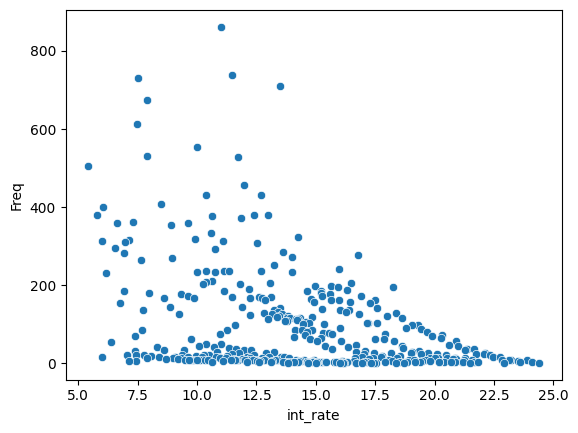

In [506]:
sns.scatterplot(x=find_freq('int_rate')['int_rate'], y=find_freq('int_rate')['Freq'])
plt.show()

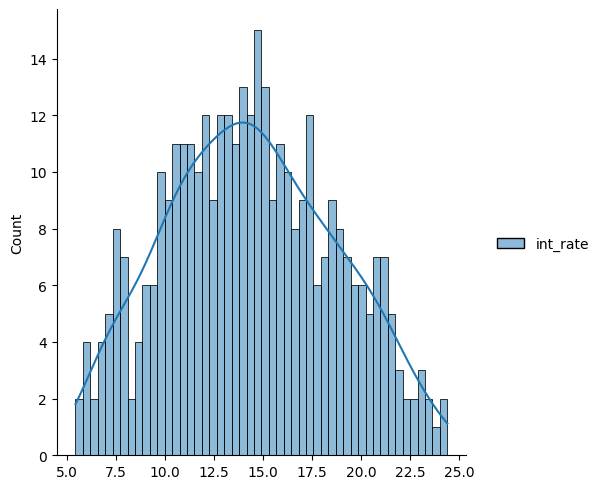

In [507]:
sns.displot(find_freq('int_rate')[['int_rate']], bins=50, kde=True)
plt.show()

In [508]:
q20 = lending_club['int_rate'].quantile(.2) # 20th Quartile
q20

7.9

In [509]:
q90 = lending_club['int_rate'].quantile(.9) # 90th Quartile
q90

16.82

In [510]:
q90 - q20

8.92

In [511]:
## Interese Rates

# Minimum interest rate charged is 5.42 ==> Freq is 507
# Maximum interest rate charged is 24.4 ==> Freq is 1
# Most commonly charged interest rate is 10.99 ==> Freq is 862

# Most people are being charged between 7.9 and 16.82 which is 70% of the people ==> a spread in interest rate of 8.9%
# with 75% of customers being charged a max of 14.42% of which 25% being charged a max of 9%
# Half of the customers are being charged a maximum interest rate of 11.83%

In [512]:
lending_club['grade'].unique()

array(['C', 'A', 'E', 'B', 'D', 'F', 'G'], dtype=object)

In [513]:
find_freq('grade')

,grade,Freq,Freq_%
1,B,10932,30.25
2,A,9269,25.65
3,C,7389,20.45
4,D,4803,13.29
5,E,2533,7.01
6,F,922,2.55
7,G,288,0.80


In [514]:
## loan-grading system assigned to customers

# grading system is divided into 7 grades from A till G
# 'A' indicating customer is highly likely to repay the loan
# 'G' being customer is least likely to payback
# Customers with 'B' grading are most common followed by 'A'
# Freqency of grades from 'C' to 'G' occur in their alphbetical order indicating decreasing no.of customers with increasing risk

In [515]:
uniq_vals('home_ownership')

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [516]:
find_freq('home_ownership')

,home_ownership,Freq,Freq_%
1,RENT,17506,48.44
2,MORTGAGE,15959,44.16
3,OWN,2574,7.12
4,OTHER,96,0.27
5,NONE,1,0.00


In [517]:
desc_col('home_ownership')

count     36136
unique        5
top        RENT
freq      17506
Name: home_ownership, dtype: object

In [518]:
lending_club[lending_club['home_ownership']=='NONE']

,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_mon,issue_yr,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc
35767,36 months,7.75,312.22,A,ups,5 yrs,NONE,22200.0,Not Verified,1,2008,Fully Paid,debt_consolidation,233xx,VA,5.24,4767,22


In [519]:
## Home Ownership ----------------------

In [520]:
uniq_vals('annual_inc').size

4903

In [709]:
round(QuartileFind('annual_inc'), 1)

25th quartile = 16800.0
75th quartile = 23400.0
IQR is 6600.0


count     1910.0
mean     19563.1
std       4277.6
min       4000.0
25%      16800.0
50%      20160.0
75%      23400.0
max      24996.0
Name: annual_inc, dtype: float64

In [704]:
lending_club['annual_inc'].mode()

0    60000.0
Name: annual_inc, dtype: float64

In [522]:
find_freq('annual_inc')

,annual_inc,Freq,Freq_%
1,60000.0,1356,3.75
2,50000.0,950,2.63
3,40000.0,794,2.20
4,45000.0,767,2.12
5,65000.0,749,2.07
...,...,...,...
4899,60096.0,1,0.00
4900,91092.0,1,0.00
4901,25300.0,1,0.00
4902,53086.0,1,0.00


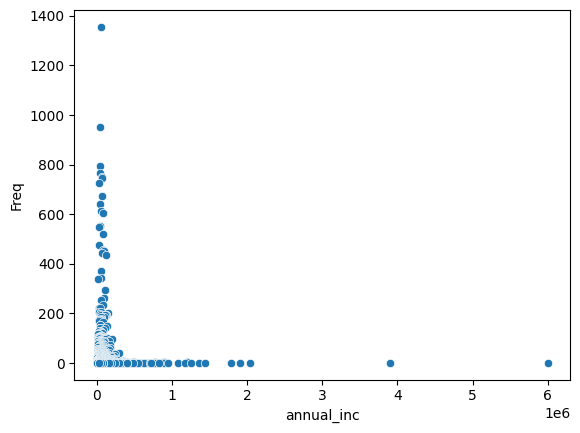

In [523]:
sns.scatterplot(x=find_freq('annual_inc')['annual_inc'], y=find_freq('annual_inc')['Freq'])
plt.show()

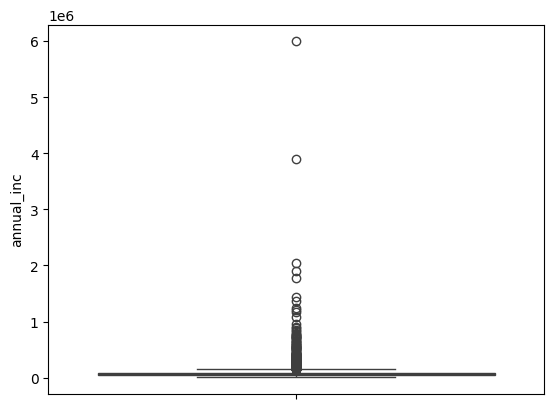

In [583]:
sns.boxplot(find_freq('annual_inc')['annual_inc'])
plt.show()

In [601]:
lending_club['annual_inc'].quantile(.90)

115000.0

In [707]:
inc_outlier = lending_club.loc[lending_club['annual_inc'] > 115000, :]

In [708]:
inc_outlier.head()

,Unnamed: 0,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_mon,issue_yr,loan_status,purpose,zip_code,addr_state,dti,revol_bal,total_acc
65,65,36 months,8.90,457.25,A,Model Metrics,0 yrs,OWN,150000.0,Source Verified,12,2011,Fully Paid,debt_consolidation,146xx,NY,14.85,63864,38
71,71,60 months,17.27,551.84,D,tutor Per ini Corporation,3 yrs,MORTGAGE,150000.0,Verified,12,2011,Fully Paid,home_improvement,115xx,NY,7.51,7334,31
82,82,60 months,19.42,214.62,E,Claret Wine Bar,3 yrs,RENT,120000.0,Source Verified,12,2011,Fully Paid,debt_consolidation,104xx,NY,2.80,10392,6
90,90,36 months,9.91,232.02,B,New York Living Solutions,6 yrs,RENT,135000.0,Not Verified,12,2011,Fully Paid,credit_card,100xx,NY,6.12,16627,18
98,98,60 months,20.89,723.38,F,charlotte regional medical center,3 yrs,MORTGAGE,120000.0,Verified,12,2011,Fully Paid,debt_consolidation,342xx,FL,12.15,14772,18


In [528]:
## Annual Income ---------------

In [529]:
uniq_vals('verification_status')

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [530]:
find_freq('verification_status')

,verification_status,Freq,Freq_%
1,Not Verified,15553,43.04
2,Verified,11391,31.52
3,Source Verified,9192,25.44


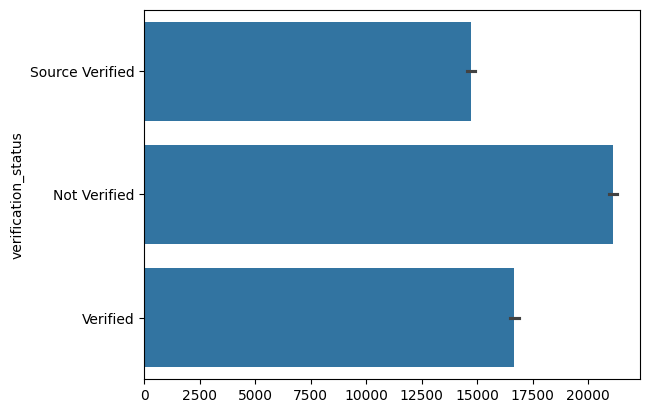

In [531]:
sns.barplot(lending_club['verification_status'])
plt.show()

In [532]:
## Verification Status --------------------

In [533]:
monfreq = find_freq('issue_mon')
monfreq

,issue_mon,Freq,Freq_%
1,12,3904,10.80
2,11,3721,10.30
3,10,3491,9.66
4,9,3302,9.14
5,8,3224,8.92
6,7,3155,8.73
7,6,2993,8.28
8,5,2752,7.62
9,4,2675,7.40
10,3,2520,6.97


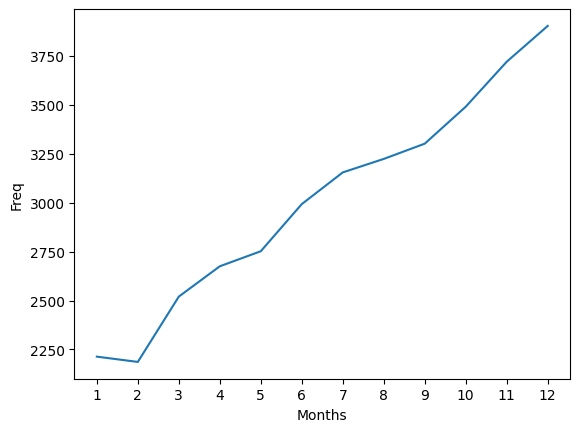

In [534]:
months = np.arange(1,13)
sns.lineplot(monfreq, x='issue_mon', y='Freq')
plt.xticks(ticks=months, labels=months)
plt.xlabel("Months")
plt.show()

In [535]:
## Issue Month --------------

In [536]:
yr_freq = find_freq('issue_yr')
yr_freq

,issue_yr,Freq,Freq_%
1,2011,19131,52.94
2,2010,10836,29.99
3,2009,4449,12.31
4,2008,1493,4.13
5,2007,227,0.63


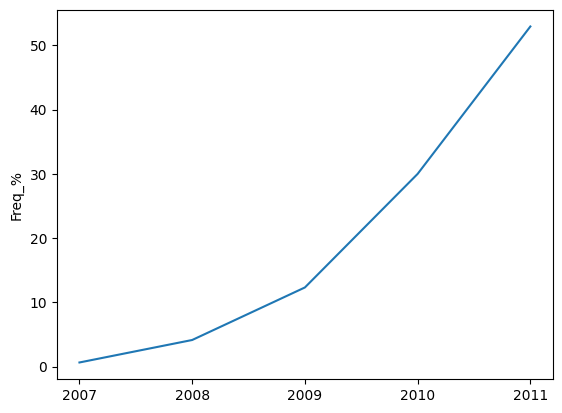

In [537]:
yr_freq_list = list(yr_freq['issue_yr'])
yr_list = np.arange(yr_freq_list[0],yr_freq_list[-1]-1, -1)

sns.lineplot(yr_freq, x=yr_list, y='Freq_%')
plt.xticks(ticks=yr_list, labels=yr_list)
plt.show()

In [538]:
## Issue Year --------------

In [539]:
find_freq('loan_status')

,loan_status,Freq,Freq_%
1,Fully Paid,31005,85.8
2,Charged Off,5131,14.2


In [540]:
## Loan Status -----------------

In [541]:
uniq_vals('purpose').size

14

In [542]:
uniq_vals('purpose')

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [543]:
find_freq('purpose')

,purpose,Freq,Freq_%
1,debt_consolidation,17231,47.68
2,credit_card,4721,13.06
3,other,3578,9.90
4,home_improvement,2666,7.38
5,major_purchase,2002,5.54
6,car,1413,3.91
7,small_business,1406,3.89
8,wedding,890,2.46
9,medical,633,1.75
10,moving,534,1.48


In [544]:
## Purpose ----------------

In [545]:
uniq_vals('dti').size

2842

In [546]:
QuartileFind('dti')

25th quartile = 8.25
75th quartile = 18.61
IQR is 10.36


count    36136.000000
mean        13.353784
std          6.646847
min          0.000000
25%          8.250000
50%         13.460000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

In [547]:
find_freq('dti')

,dti,Freq,Freq_%
1,0.00,162,0.45
2,18.00,42,0.12
3,12.00,41,0.11
4,19.20,37,0.10
5,12.48,36,0.10
...,...,...,...
2838,29.58,1,0.00
2839,26.44,1,0.00
2840,29.40,1,0.00
2841,25.19,1,0.00


In [548]:
## Debt  to Income Ratio

In [549]:
uniq_vals('delinq_2yrs')

KeyError: 'delinq_2yrs'

In [550]:
find_freq('delinq_2yrs')

KeyError: 'delinq_2yrs'

In [551]:
## delinq_2yrs ---------------

In [552]:
lending_club['revol_bal'].isnull().sum()

0

In [553]:
round(QuartileFind('revol_bal'), 2)

25th quartile = 3738.0
75th quartile = 17035.0
IQR is 13297.0


count     36136.00
mean      13349.53
std       15722.08
min           0.00
25%        3738.00
50%        8897.00
75%       17035.00
max      149588.00
Name: revol_bal, dtype: float64

In [554]:
lending_club['revol_bal'].mode()

0    0
Name: revol_bal, dtype: int64

In [555]:
find_freq('revol_bal')[:10]

,revol_bal,Freq,Freq_%
1,0,891,2.47
2,1,11,0.03
3,39,9,0.02
4,1763,9,0.02
5,23,8,0.02
6,6,8,0.02
7,52,8,0.02
8,13368,8,0.02
9,1284,8,0.02
10,865,8,0.02


In [556]:
## Revolving Balance -------------

In [557]:
lending_club['revol_util'].isnull().sum()

KeyError: 'revol_util'

In [558]:
round(QuartileFind('revol_util'), 2)

KeyError: 'revol_util'

In [559]:
find_freq('revol_util')

KeyError: 'revol_util'

In [560]:
## Revolving Utilities ----------------

In [561]:
QuartileFind('recoveries')

KeyError: 'recoveries'

In [562]:
find_freq('recoveries')

KeyError: 'recoveries'

In [563]:
## Recoveries -------------------

In [564]:
orgs = uniq_vals('emp_title')
orgs.size      # Number of different Organizations customers work

27787

In [565]:
find_freq('emp_title')

,emp_title,Freq,Freq_%
1,US Army,133,0.37
2,Bank of America,107,0.30
3,IBM,66,0.18
4,AT&T,61,0.17
5,Kaiser Permanente,56,0.15
...,...,...,...
27783,Stevens Aviation,1,0.00
27784,Valir Health,1,0.00
27785,ESAB,1,0.00
27786,Whole Health Dentistry,1,0.00


In [566]:
## Organizations employees work-in --------------------

In [567]:
exp_yrs = uniq_vals('emp_length')[:-1]
uniq_vals('emp_length')

array(['0 yrs', '10+ yrs', '3 yrs', '8 yrs', '9 yrs', '5 yrs', '4 yrs',
       '1 yrs', '6 yrs', '2 yrs', '7 yrs'], dtype=object)

In [568]:
lending_club['emp_length'].isnull().sum()

0

In [569]:
emp_len = find_freq('emp_length')
emp_len

,emp_length,Freq,Freq_%
1,10+ yrs,8156,22.57
2,2 yrs,4178,11.56
3,0 yrs,4127,11.42
4,3 yrs,3901,10.80
5,4 yrs,3266,9.04
6,5 yrs,3091,8.55
7,1 yrs,3067,8.49
8,6 yrs,2099,5.81
9,7 yrs,1663,4.60
10,8 yrs,1391,3.85


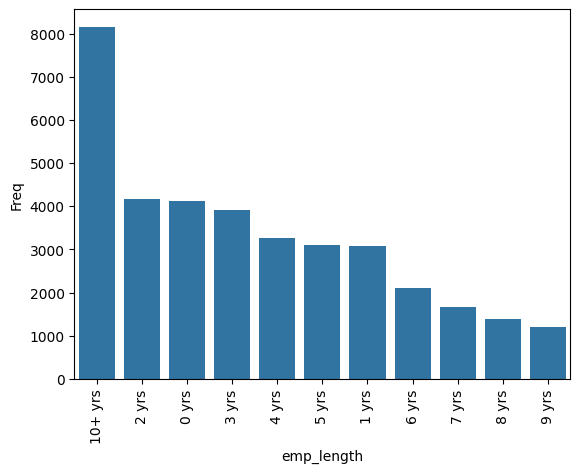

In [570]:
sns.barplot(x=emp_len['emp_length'], y=emp_len['Freq'])
plt.xticks(rotation=90)
plt.show()

In [571]:
## Employee Experience -------------------

In [572]:
states = uniq_vals('addr_state')
states.size

50

In [573]:
states

array(['GA', 'CA', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [574]:
top10_states = find_freq('addr_state')[:10]
find_freq('addr_state')

,addr_state,Freq,Freq_%
1,CA,6498,17.98
2,NY,3476,9.62
3,FL,2590,7.17
4,TX,2509,6.94
5,NJ,1707,4.72
6,IL,1394,3.86
7,PA,1386,3.84
8,VA,1294,3.58
9,GA,1279,3.54
10,MA,1215,3.36


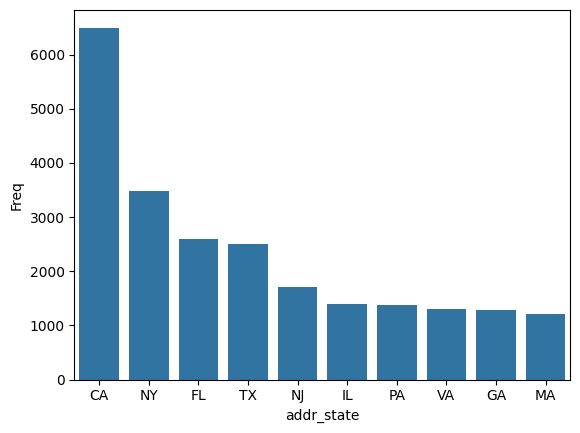

In [575]:
sns.barplot(x=top10_states['addr_state'], y=top10_states['Freq'])
plt.show()

In [576]:
## States ----------------

In [577]:
lending_club['zip_code'].isnull().sum()

0

In [578]:
uniq_vals('zip_code').size

817

In [579]:
find_freq('zip_code')

,zip_code,Freq,Freq_%
1,100xx,550,1.52
2,945xx,500,1.38
3,112xx,476,1.32
4,606xx,472,1.31
5,070xx,437,1.21
...,...,...,...
813,353xx,1,0.00
814,252xx,1,0.00
815,289xx,1,0.00
816,881xx,1,0.00


In [580]:
## zip-codes --------------------

In [581]:
sns.histplot(lending_club['funded_amnt'])
plt.show()

KeyError: 'funded_amnt'